# Intro

Dans cette partie, nous allons traiter/analyser nos données et justifier nos choix pratiques/éthiques au niveau des features choisis.

In [174]:
import pandas as pd
from datetime import datetime

#ouverture Mise en Dataframe des données
employee_survey_data_path = "datas/employee_survey_data.csv"
manager_survey_data_path = "datas/manager_survey_data.csv"
general_data_path = "datas/general_data.csv"
in_time_data_path = "datas/in_time.csv"
out_time_data_path = "datas/out_time.csv"

# employee_survey_data = pd.read_csv(employee_survey_data_path)
# manager_survey_data = pd.read_csv(manager_survey_data_path)
# general_data = pd.read_csv(general_data_path)
in_time_data = pd.read_csv(in_time_data_path)
out_time_data = pd.read_csv(out_time_data_path)

datas_raw = [0]*4

datas_raw[0] = pd.read_csv(employee_survey_data_path)
datas_raw[1] = pd.read_csv(general_data_path)
datas_raw[2] = pd.read_csv(manager_survey_data_path)




def merge_datas(datas):
    merged_datas = datas[0]
    for i in range(len(datas)-1):
        merged_datas = pd.merge(merged_datas, datas[i+1], on='EmployeeID', how='inner')
    return merged_datas


In [175]:
def to_datetime(strdate):
    if type(strdate) == str:
        return datetime.strptime(strdate, "%Y-%m-%d %H:%M:%S").timestamp()
    else:
        return 0



def get_working_time(in_time_data, out_time_data):
    out_time_df = (
        out_time_data
        .iloc[:,1:]
        .applymap(lambda x: to_datetime(x))
    )
    in_time_df = (
        in_time_data
        .iloc[:,1:]
        .applymap(lambda x: to_datetime(x))
    )
    hours_per_day = out_time_df - in_time_df
    in_time_data["MeanWorkingHours"] = hours_per_day.mean(axis = 1)/3600
    return in_time_data[["EmployeeID", "MeanWorkingHours"]]

datas_raw[3] = get_working_time(in_time_data, out_time_data)

datas_raw[3]

,EmployeeID,MeanWorkingHours
0,1,6.554356
1,2,6.979604
2,3,6.502698
3,4,6.477067
4,5,7.515375
...,...,...
4405,4406,7.934534
4406,4407,5.626061
4407,4408,6.820812
4408,4409,8.765193


merging:

In [176]:
datas = merge_datas(datas_raw)
datas

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,MeanWorkingHours
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,8,0,1.0,6,1,0,0,3,3,6.554356
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,8,1,6.0,3,5,1,4,2,4,6.979604
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,8,3,5.0,2,5,0,3,3,3,6.502698
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,...,8,3,13.0,5,8,7,5,2,3,6.477067
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,...,8,2,9.0,2,6,0,4,3,3,7.515375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,4.0,1.0,3.0,42,No,Travel_Rarely,Research & Development,5,4,...,8,1,10.0,5,3,0,2,3,3,7.934534
4406,4407,4.0,4.0,3.0,29,No,Travel_Rarely,Research & Development,2,4,...,8,0,10.0,2,3,0,2,2,3,5.626061
4407,4408,1.0,3.0,3.0,25,No,Travel_Rarely,Research & Development,25,2,...,8,0,5.0,4,4,1,2,3,4,6.820812
4408,4409,4.0,1.0,3.0,42,No,Travel_Rarely,Sales,18,2,...,8,1,10.0,2,9,7,8,2,3,8.765193


# Filtre Ethique
ici, on enleve les features ethiquement discutables. On a identifié:
- age
- Gender
- MaritalStatus

In [177]:
datas.drop(columns=["Age","Gender","MaritalStatus"], axis=1, inplace=True, errors="ignore")
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
 4   Attrition                4410 non-null   object 
 5   BusinessTravel           4410 non-null   object 
 6   Department               4410 non-null   object 
 7   DistanceFromHome         4410 non-null   int64  
 8   Education                4410 non-null   int64  
 9   EducationField           4410 non-null   object 
 10  EmployeeCount            4410 non-null   int64  
 11  JobLevel                 4410 non-null   int64  
 12  JobRole                  4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

# Traitement des données non numériques

Il nous reste 4382 instances, on a donc toujours largement assez de données

Il faut maintenant gérer nos données qui sont autres que numériques

Premièrement, nous allons quantifier la fréquence de voyages d'affaires de nos salariés:

In [179]:
#import numpy as np
from sklearn.preprocessing import OrdinalEncoder


mapping_dict = {'Non-Travel': 1, 'Travel_Rarely': 2, 'Travel_Frequently': 3}

datas['BusinessTravel'] = datas['BusinessTravel'].map(mapping_dict)


# encoder.fit()

In [180]:
mapping_dict = {'No': 0, 'Yes': 1}
datas['Attrition'] = datas['Attrition'].map(mapping_dict)

datas

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,MeanWorkingHours
0,1,3.0,4.0,2.0,0,2,Sales,6,2,Life Sciences,...,8,0,1.0,6,1,0,0,3,3,6.554356
1,2,3.0,2.0,4.0,1,3,Research & Development,10,1,Life Sciences,...,8,1,6.0,3,5,1,4,2,4,6.979604
2,3,2.0,2.0,1.0,0,3,Research & Development,17,4,Other,...,8,3,5.0,2,5,0,3,3,3,6.502698
3,4,4.0,4.0,3.0,0,1,Research & Development,2,5,Life Sciences,...,8,3,13.0,5,8,7,5,2,3,6.477067
4,5,4.0,1.0,3.0,0,2,Research & Development,10,1,Medical,...,8,2,9.0,2,6,0,4,3,3,7.515375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,4.0,1.0,3.0,0,2,Research & Development,5,4,Medical,...,8,1,10.0,5,3,0,2,3,3,7.934534
4406,4407,4.0,4.0,3.0,0,2,Research & Development,2,4,Medical,...,8,0,10.0,2,3,0,2,2,3,5.626061
4407,4408,1.0,3.0,3.0,0,2,Research & Development,25,2,Life Sciences,...,8,0,5.0,4,4,1,2,3,4,6.820812
4408,4409,4.0,1.0,3.0,0,2,Sales,18,2,Medical,...,8,1,10.0,2,9,7,8,2,3,8.765193


En explorant nos données, on remarque qu'il y a des données uniques pour toutes nos itérations:

In [181]:

#clean les donnees string ici avant ce bloc!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#datas.hist(bins=50, figsize=(20,15))

on peut donc enlever:
- EmployeeCount
- Over18
- StandardHours

In [182]:
datas.drop(columns=["EmployeeCount","Over18","StandardHours"], errors="ignore", inplace=True)
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
 4   Attrition                4410 non-null   int64  
 5   BusinessTravel           4410 non-null   int64  
 6   Department               4410 non-null   object 
 7   DistanceFromHome         4410 non-null   int64  
 8   Education                4410 non-null   int64  
 9   EducationField           4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  PercentSalaryHike       

Faisons maintenant des OneHotEncoders des données string restantes

In [185]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
encoded_datas_array = one_hot_encoder.fit_transform(datas[[
    "EducationField", "Department", "JobRole",]]).toarray()
encoded_datas_labels = one_hot_encoder.categories_
encoded_datas_labels = np.hstack([
    ["EducationField_" + x for x in encoded_datas_labels[0]],
    ["Department_" + x for x in encoded_datas_labels[1]],
    ["JobRole_" + x for x in encoded_datas_labels[2]]
    ])
encoded_data = pd.DataFrame(encoded_datas_array, columns=encoded_datas_labels)
#encoded_data["EmployeeID"] = datas["EmployeeID"]


datas.drop(['EducationField', 'Department', "JobRole"], axis=1, inplace=True, errors="ignore")
datas.info()



<class 'pandas.core.frame.DataFrame'>
Index: 4300 entries, 0 to 4408
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4300 non-null   int64  
 1   EnvironmentSatisfaction  4300 non-null   float64
 2   JobSatisfaction          4300 non-null   float64
 3   WorkLifeBalance          4300 non-null   float64
 4   Attrition                4300 non-null   int64  
 5   BusinessTravel           4300 non-null   int64  
 6   DistanceFromHome         4300 non-null   int64  
 7   Education                4300 non-null   int64  
 8   JobLevel                 4300 non-null   int64  
 9   MonthlyIncome            4300 non-null   int64  
 10  NumCompaniesWorked       4300 non-null   float64
 11  PercentSalaryHike        4300 non-null   int64  
 12  StockOptionLevel         4300 non-null   int64  
 13  TotalWorkingYears        4300 non-null   float64
 14  TrainingTimesLastYear    4300

/tmp/ipykernel_25241/3655359681.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas.drop(['EducationField', 'Department', "JobRole"], axis=1, inplace=True, errors="ignore")


# Vérification d'exhaustivité
Dans un premier temps, on regarde les données pour voir s'il y a des features manquantes pour certaines instances.

In [186]:
datas = datas.dropna(subset=datas.columns)
datas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4300 entries, 0 to 4408
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4300 non-null   int64  
 1   EnvironmentSatisfaction  4300 non-null   float64
 2   JobSatisfaction          4300 non-null   float64
 3   WorkLifeBalance          4300 non-null   float64
 4   Attrition                4300 non-null   int64  
 5   BusinessTravel           4300 non-null   int64  
 6   DistanceFromHome         4300 non-null   int64  
 7   Education                4300 non-null   int64  
 8   JobLevel                 4300 non-null   int64  
 9   MonthlyIncome            4300 non-null   int64  
 10  NumCompaniesWorked       4300 non-null   float64
 11  PercentSalaryHike        4300 non-null   int64  
 12  StockOptionLevel         4300 non-null   int64  
 13  TotalWorkingYears        4300 non-null   float64
 14  TrainingTimesLastYear    4300

# Scaling
Ici, nous allons mettre toutes nos valeurs sur la même échelle. 

In [187]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler().fit(datas)
datas_scaled = pd.DataFrame(std_scale.transform(datas), columns=datas.columns)
datas_scaled

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Attrition,BusinessTravel,DistanceFromHome,Education,JobLevel,MonthlyIncome,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,MeanWorkingHours
0,-1.738009,0.252403,1.157359,-1.075518,-0.439076,-0.161282,-0.394993,-0.891282,-0.964277,1.405193,...,-1.149725,-0.931939,-1.320442,2.483520,-0.980272,-0.677926,-1.159067,0.38155,-0.426577,-0.334951
1,-1.737223,0.252403,-0.657940,1.750469,2.277510,1.718161,0.099071,-1.867220,-0.964277,-0.492557,...,2.126858,0.239797,-0.678523,0.157924,-0.329582,-0.368371,-0.037179,-1.02554,2.344242,-0.000306
2,-1.736437,-0.661946,-0.657940,-2.488512,-0.439076,1.718161,0.963683,1.060595,1.746964,2.725773,...,-0.057531,2.583269,-0.806907,-0.617274,-0.329582,-0.677926,-0.317651,0.38155,-0.426577,-0.375603
3,-1.735651,1.166752,1.157359,0.337475,-0.439076,-2.040726,-0.889057,2.036534,0.843217,0.385846,...,-1.149725,2.583269,0.220163,1.708321,0.158435,1.488960,0.243293,-1.02554,-0.426577,-0.395773
4,-1.734864,1.166752,-1.565590,0.337475,-0.439076,-0.161282,0.099071,-1.867220,-0.964277,-0.885202,...,-0.876677,1.411533,-0.293372,-0.617274,-0.166910,-0.677926,-0.037179,0.38155,-0.426577,0.421314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,1.724337,0.252403,1.157359,0.337475,-0.439076,-0.161282,-0.642025,0.084657,-0.060530,-0.630737,...,0.761615,-0.931939,-0.678523,-0.617274,-0.166910,-0.368371,0.243293,-1.02554,-0.426577,-0.149622
4296,1.725123,1.166752,-1.565590,0.337475,-0.439076,-0.161282,-0.518509,1.060595,-0.964277,-0.101400,...,0.488567,0.239797,-0.164988,1.708321,-0.654927,-0.677926,-0.598123,0.38155,-0.426577,0.751168
4297,1.725910,1.166752,1.157359,0.337475,-0.439076,-0.161282,-0.889057,1.060595,-0.964277,-0.813561,...,-0.057531,-0.931939,-0.164988,-0.617274,-0.654927,-0.677926,-0.598123,-1.02554,-0.426577,-1.065464
4298,1.726696,-1.576295,0.249709,0.337475,-0.439076,-0.161282,1.951811,-0.891282,-0.060530,-0.596086,...,1.307712,-0.931939,-0.806907,0.933123,-0.492255,-0.368371,-0.598123,0.38155,2.344242,-0.125266


# Choix des features


EmployeeID                -0.001707
EnvironmentSatisfaction   -0.103485
JobSatisfaction           -0.103098
WorkLifeBalance           -0.059817
Attrition                  1.000000
BusinessTravel             0.122725
DistanceFromHome          -0.008314
Education                 -0.015237
JobLevel                  -0.014587
MonthlyIncome             -0.032629
NumCompaniesWorked         0.043911
PercentSalaryHike          0.034425
StockOptionLevel          -0.007971
TotalWorkingYears         -0.168637
TrainingTimesLastYear     -0.046239
YearsAtCompany            -0.133612
YearsSinceLastPromotion   -0.029931
YearsWithCurrManager      -0.155420
JobInvolvement            -0.014705
PerformanceRating          0.026262
MeanWorkingHours           0.195102
Name: Attrition, dtype: float64


<AxesSubplot:>

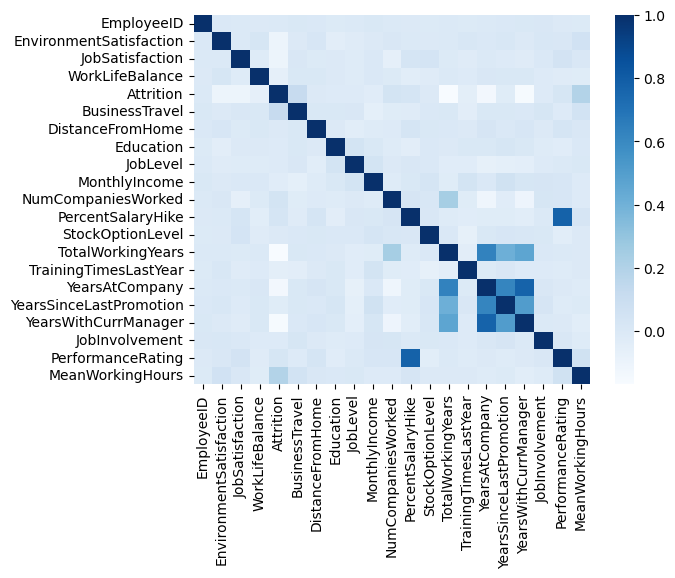

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

corr =datas_scaled.corr()
print(corr["Attrition"])
sns.heatmap(corr, cmap=plt.cm.Blues)